In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-multilearn

# to convert emojis to text
!pip install emot
!pip install xgboost
!pip install Textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 21 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd
import re
import gc
import os
import fileinput
import string
import tensorflow as tf
import zipfile
import datetime
import sys
from tqdm  import tqdm
tqdm.pandas()
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers import Embedding
from sklearn.metrics import classification_report
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


from skmultilearn.ensemble import MajorityVotingClassifier
from skmultilearn.cluster import FixedLabelSpaceClusterer
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
path = '/content/drive/MyDrive/Colab Notebooks/Final/ML_performance'

In [ ]:
# import libraries and packages

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.feature_extraction.text import  CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.ensemble import VotingClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

from textblob import TextBlob

import nltk.data
import numpy as np 
import pandas as pd
import re
import time
import string

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final/Bengali Data.csv',encoding='UTF-8')

data

,Data,Type,Source,English Translation,Category,100%,Annotation
0,আধিবাসী না দাদা উপজাতি,Comments,Facebook,"brother, it's tribal not indegeneous",community,100,Bully
1,প্রথমে মনে গোজ্জোং লাগেজ বুক্কে,Comments,Tiktok,first I thought she was carrying lugguage(mock...,woman/girl,60,Bully
2,জুম্ম হাপ্পো,Comments,Facebook,shifting cultivator who eats snake,community + men/boy,80,Bully
3,চিদোলি,Comments,Facebook,woman who eats ferminated fishpaste(fishpaste ...,women/girls,100,Bully
4,মেদে রা হও হি দেগিনে লাং তগহ,Comments,Facebook,"eat stool,what you find connection between them",men/boys,100,Bully
...,...,...,...,...,...,...,...
221,তাম্মারে সুদোপরিবুদে,Comments,Facebook,fuck her mother,women/girls,100,Bully
222,উত্তর দেনা হুব দোল ওয়ি,Comments,Facebook,you have given the nicest answer,men/boys,0,Not Bully
223,জুম্ম পেইজ নিনে হিজু হদা যিয়ানি মর হুব হিক্কে ...,Posts,Facebook,some thoughts on jumma pages and how I feel,all,0,Not Bully
224,লের কা মগদামি,Posts,Facebook,eat samen you bitch,women/girls,100,Bully


#Data Preparation

In [ ]:
data.columns

Index(['Data', 'Type', 'Source', 'English Translation', 'Category', '100%',
       'Annotation'],
      dtype='object')

In [ ]:

# print some unprocessed data
sample_data = [10,51,20,55,45,70,81]
for i in sample_data:
      print(data.Data[i],'\n','Type:-- ',data.Type[i],'\n','Sentiment:-- ',data.Annotation[i],'\n')

ওহ্...বুক আজতে আজতে লেদা মুই  
 Type:--  Comments 
 Sentiment:--  Not Bully 

ঘটনা গান হি? 
 Type:--  Comments 
 Sentiment:--  Not Bully 

হদা আন মন্দ নয় 
 Type:--  Comments 
 Sentiment:--  Not Bully 

এ ফল উন মাগানা হাগোই হলে ও ন হেম, 
 Type:--  Comments 
 Sentiment:--  Not Bully 

ইয়েনি দেগিলে ইজু মনত দুগ বাড়েদে, ধর্ম নামে ইয়েনি হন ধরনর বোকামি! 
 Type:--  Comments 
 Sentiment:--  Not Bully 

এবতে হবর পদে দে 
 Type:--  Comments 
 Sentiment:--  Not Bully 

সিদোল আন পজা বাজ পেয়ি নাহি? 
 Type:--  Comments 
 Sentiment:--  Bully 



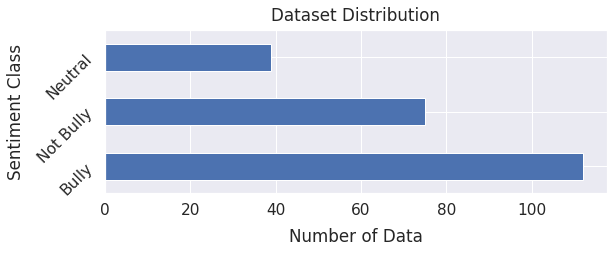

In [ ]:
sns.set(font_scale=1.4)
data['Annotation'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Data", labelpad=10)
plt.ylabel("Sentiment Class", labelpad=10)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);


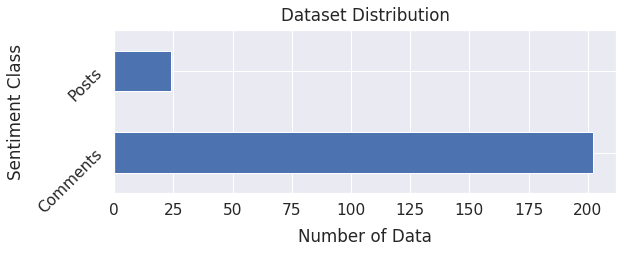

In [ ]:
sns.set(font_scale=1.4)
data['Type'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Data", labelpad=10)
plt.ylabel("Sentiment Class", labelpad=10)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

# Data Cleaning

In [ ]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 9.4 MB/s 
     |████████████████████████████████| 23.9 MB 1.1 MB/s 
     |████████████████████████████████| 1.0 MB 71.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# Data cleaning function
def process_data(Data): 
    Data = re.sub('[^\u0980-\u09FF]',' ',str(Data)) #removing unnecessary punctuation
    return Data


In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['Data'].apply(process_data)  


# print some cleaned reviews from the dataset
sample_data = [2,10,27,32,55,47,77,85,96,90,59,63,64,104]
for i in sample_data:
     print('Original:\n',data.Data[i],'\nCleaned:\n',
           data.cleaned[i],'\n',
           'Type:',data.Type[i],
           '\n','Sentiment:-- ',data.Annotation[i],'\n')

Original:
 জুম্ম হাপ্পো 
Cleaned:
 জুম্ম হাপ্পো 
 Type: Comments 
 Sentiment:--  Bully 

Original:
 ওহ্...বুক আজতে আজতে লেদা মুই  
Cleaned:
 ওহ্   বুক আজতে আজতে লেদা মুই  
 Type: Comments 
 Sentiment:--  Not Bully 

Original:
 তুই দ,যে তালত ভাত হাজ, সিয়ত আগি দোজ। 
Cleaned:
 তুই দ যে তালত ভাত হাজ  সিয়ত আগি দোজ  
 Type: Comments 
 Sentiment:--  Neutral 

Original:
 আমা চাঙমাউনে টেঙা হামেবাক ব্লগ গরিনেই তারা সেগুন মানজোরে গম হামদ সাহায্য সহযোগিতা ন গরিবাক 
Cleaned:
 আমা চাঙমাউনে টেঙা হামেবাক ব্লগ গরিনেই তারা সেগুন মানজোরে গম হামদ সাহায্য সহযোগিতা ন গরিবাক 
 Type: Comments 
 Sentiment:--  Neutral 

Original:
 এ ফল উন মাগানা হাগোই হলে ও ন হেম, 
Cleaned:
 এ ফল উন মাগানা হাগোই হলে ও ন হেম  
 Type: Comments 
 Sentiment:--  Not Bully 

Original:
  জিবে এডিট গজ্জে সিবের পাপ অবদে 
Cleaned:
  জিবে এডিট গজ্জে সিবের পাপ অবদে 
 Type: Comments 
 Sentiment:--  Neutral 

Original:
 ব্রো হনো সেগা হেলে নাহি 
Cleaned:
 ব্রো হনো সেগা হেলে নাহি 
 Type: Comments 
 Sentiment:--  Not Bully 

Original:
 যেনে

#Dataset Summary

In [ ]:
def data_summary(data):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(data.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in data.Annotation.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(data[data.Annotation==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(data[data.Annotation==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(data[data.Annotation==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(data)


Class Name :  Bully
Number of Documents:112
Number of Words:675
Number of Unique Words:481
Most Frequent Words:

মগদা	8
দ	8
ন	8
লের	7
হি	6
দক	6
সি	6
গম	6
না	5
তুই	5

Class Name :  Not Bully
Number of Documents:75
Number of Words:579
Number of Unique Words:427
Most Frequent Words:

হি	8
ন	8
হদা	8
দোল	8
দে	5
আগে	5
নয়	5
গুরি	5
ধর্ম	5
গম	4

Class Name :  Neutral
Number of Documents:39
Number of Words:285
Number of Unique Words:235
Most Frequent Words:

ন	8
দ	7
তুই	6
তর	4
মিলে	3
নাহি	3
আর	3
আই	3
তারা	2
সিয়ত	2
Total Number of Unique Words:978


#Dataset Summary Visualization

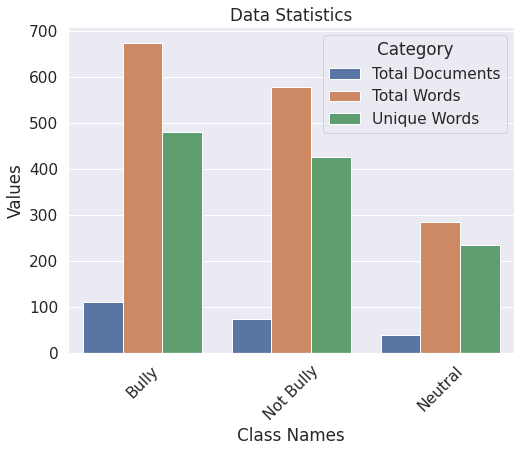

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

#Text Length Calculation

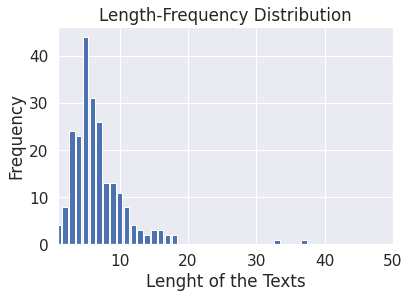

Maximum Length of a review: 37
Minimum Length of a review: 1
Average Length of a reviews: 7.0


In [ ]:
# Calculate the Review of each of the Review
data['ReviewLength'] = data.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 50)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(data.ReviewLength)}")
print(f"Minimum Length of a review: {min(data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(data.ReviewLength),0)}")

#Take only Positive and Negative Class for Model Building

In [ ]:
neutral = data[data.Annotation == 'Neutral']
bully = data[data.Annotation == 'Bully'][:4000]
data = neutral.append(bully,ignore_index=True)
data.Annotation.value_counts()

Bully      112
Neutral     39
Name: Annotation, dtype: int64

#Label Encoding and Dataset Splitting

In [ ]:
#==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.7,
                                                  test_size = 0.3,random_state =0)
    print("\nFeature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
data.cleaned = data.cleaned.apply(lambda x:x.replace('\n',' '))

#Model Building Using Machine Learning Feature Extraction Using TF-IDF

In [ ]:
#======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
#============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================
            
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

#Model Training

In [ ]:
import json

## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(data.cleaned,gram)
    labels = label_encoding(data.Annotation,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)


Feature Size :======> 662

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 151 
	Training		 105 
	Test			 46


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a


Feature Size :======> 1438

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 151 
	Training		 105 
	Test			 46


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a


Feature Size :======> 2082

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 151 
	Training		 105 
	Test			 46


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Performance Table

In [ ]:

# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     73.91       0.00    0.00      0.00          LR
1     71.74       0.00    0.00      0.00          DT
2     73.91       0.00    0.00      0.00          RF
3     65.22      16.67    8.33     11.11         MNB
4     73.91      50.00    8.33     14.29         KNN
5     73.91       0.00    0.00      0.00  Linear SVM
6     73.91       0.00    0.00      0.00     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by LR at = 73.91
Highest F1-Score achieved by KNN at = 14.29
Highest Precision Score achieved by KNN at = 50.0
Highest Recall Score achieved by MNB at = 8.33

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     73.91       0.00    0.00      0.00          LR
1     71.74       0.00    0.00      0.00          DT
2     73.91       0.00    0.00      0.00          RF
3     58.70      

Performance Visualization

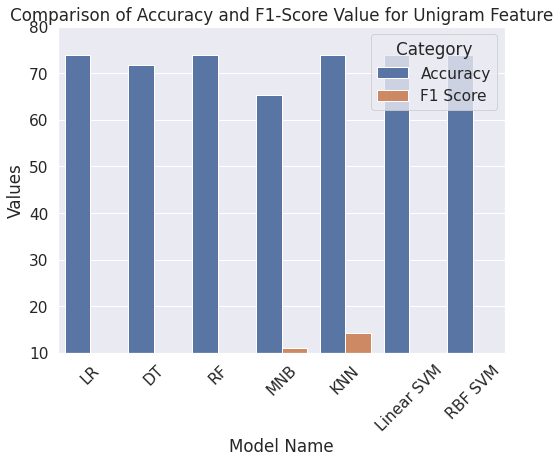

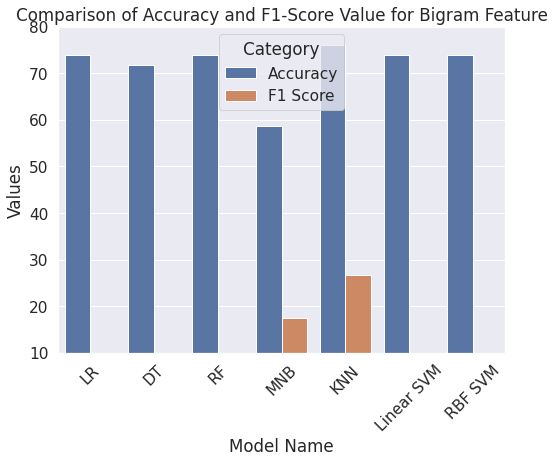

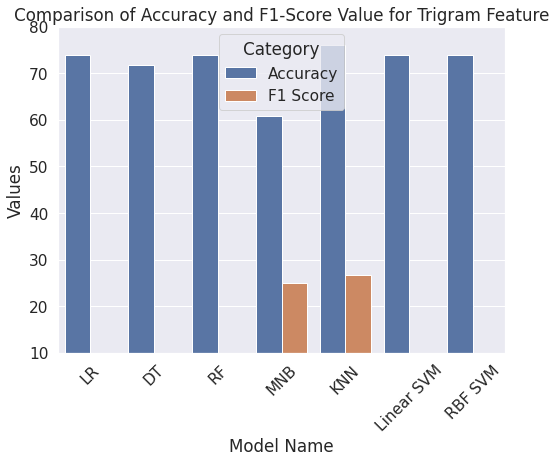

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);